# Analysis of the Boston Housing Dataset
In this notebook, we are going to perform a regression analysis on the Boston Housing data set using all the available variables. The notebook has been derived from the following Kaggle notebooks:

- tolgahancepel's https://www.kaggle.com/tolgahancepel/boston-housing-regression-analysis/
- Prasad Perera's https://www.kaggle.com/prasadperera/the-boston-housing-dataset

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import math
from scipy import stats

# Regression models
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV

# Model evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
X = boston.data
y = boston.target

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Note that all the variables have 506 values which is exactly the number of rows read. This means that we don't have any missing value. If you want to be sure we count the number of "null" values for each variables as follows:

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Indeed, we don't have any missing value.

We can also check the value distribution of all the variables at once using boxplots. 

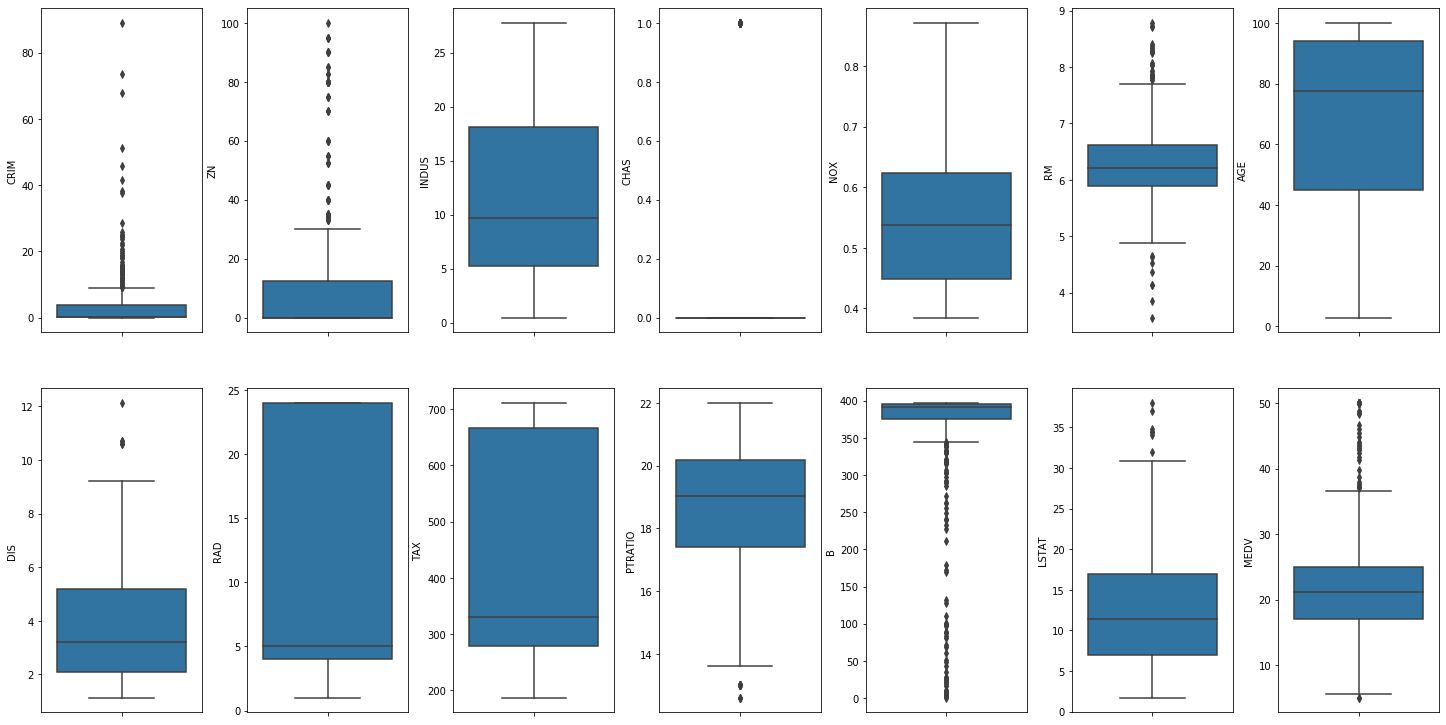

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The boxplots suggest that columns like CRIM, ZN, RM, B have outliers. Also the target variable MEDV has some outliers for values between 40 and 50 and this will come back later when we will be evaluating our linear regression models. We can check the percentage of outliers in every column by computing the first and third quartile ($Q_1$ and $Q_3$), the interquartile difference (IRQ) and check the percentage of values that are smaller than  $Q_1-1.5*$IRQ and larger than $Q_3+1.5*$IRQ.

Note that attribute *CHAS* is a boolean variable so the corresponding boxplot is not informative for such type of variable and thus it should not be considered.

Note that this definition of *outlier* is specific to boxplots and does not define the broad concept of outlier which is typically task dependent and cannot be identified by one unique formula as done in boxplots.

In [10]:
outliers_percentage = []
variables = []
for k, v in df.items():
    Q1 = v.quantile(0.25)
    Q3 = v.quantile(0.75)
    IRQ = Q3 - Q1
    v_col = v[(v <= Q1 - 1.5 * IRQ) | (v >= Q3 + 1.5 * IRQ)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    outliers_percentage.append(perc)
    variables.append(k)
#     print("Column %s outliers = %.2f%%" % (k, perc))

outliers = pd.DataFrame({'Variable':variables, '% Outliers':outliers_percentage })
outliers.sort_values(by=["% Outliers"],ascending=False)

,Variable,% Outliers
3,CHAS,100.000000
11,B,15.217391
1,ZN,13.438735
0,CRIM,13.043478
13,MEDV,7.905138
5,RM,5.928854
10,PTRATIO,2.964427
12,LSTAT,1.383399
7,DIS,0.988142
2,INDUS,0.000000


Again, since *CHAS* is a boolean variable should not be looked at since the percentage of outliers in this case is meaningless. It is interesting to note that the target variable *MEDV* have 7.9% of outliers with values above 40 (see the boxplots) and this will come out again when analyzing the performance of linear regression models.

## Some Data Exploration
Let's explore the data a little bit. The data set is very simple but still it is good practice to do it anyway. 

### Correlation Analysis
We start by analyzing the correlations and plot the correlation matrix using a clustermap which applies hierarchical clustering on the rows/columns of the table.

<Figure size 864x864 with 0 Axes>

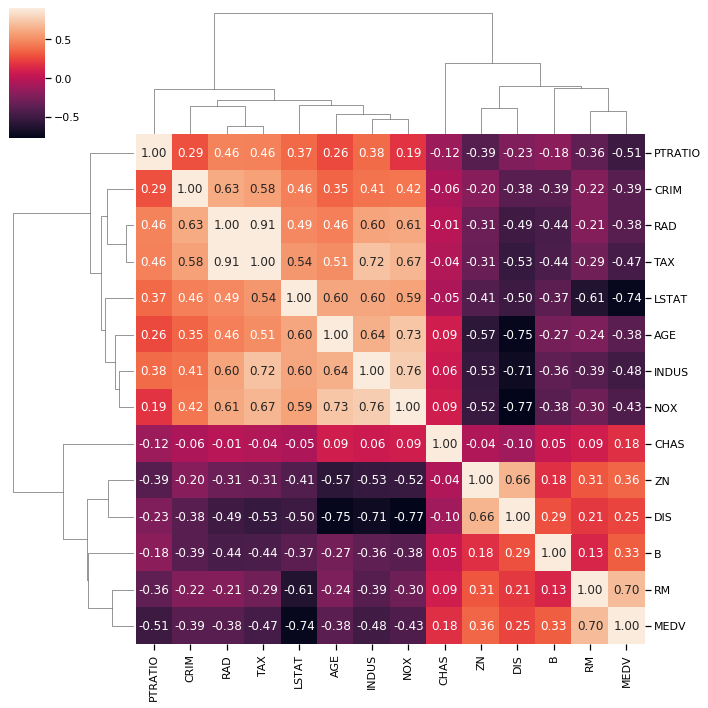

In [11]:
corrmat = df.corr();
plt.figure(figsize=(12,12));

# Setting the default font size when plotting in notebooks (used to clear previous settings)
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

# Plot the clustermap
sns.clustermap(corrmat, annot=True,vmax=0.9,fmt=".2f");

The correlation matrix shows that *TAX* and *RAD* are highly positively correlated (0.91). Now, let's check on what variables are highly correlated with the target (*MEDV*) since they might be the candidate input variables for a predictive model.

In [12]:
correlation_with_target = pd.DataFrame({'Variable':boston.feature_names,'Correlation':[df['MEDV'].corr(df[variable]) for variable in boston.feature_names]})

# we are interested both in positive and negative correlations so we are going to use their absolute value
correlation_with_target['|Correlation|'] = np.abs(correlation_with_target['Correlation']) 

correlation_with_target.sort_values(by=['|Correlation|'],ascending=False)

,Variable,Correlation,|Correlation|
12,LSTAT,-0.737663,0.737663
5,RM,0.695360,0.695360
10,PTRATIO,-0.507787,0.507787
2,INDUS,-0.483725,0.483725
9,TAX,-0.468536,0.468536
4,NOX,-0.427321,0.427321
0,CRIM,-0.388305,0.388305
8,RAD,-0.381626,0.381626
6,AGE,-0.376955,0.376955
1,ZN,0.360445,0.360445


*LSTAT*, *RM* *PTRAIO*, *INDUS* have an absolute correlation score with *MEDV* that is near to 0.5 or above. This might suggest that these six variables might be good predictors. So for instance we could build our first models using one or more of these variables. Let's plot each variable against MEDV. Let's plot each variable against the target.

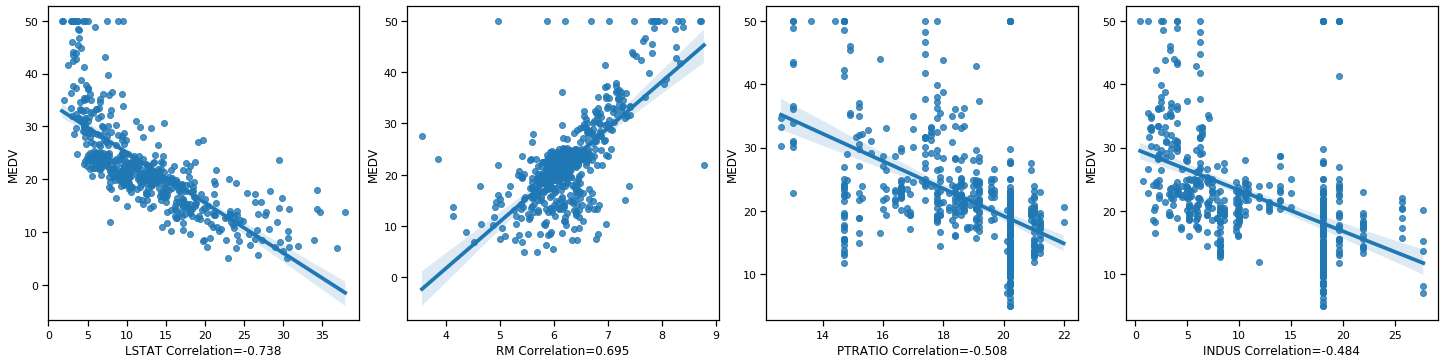

In [13]:
from sklearn.preprocessing import MinMaxScaler

# We scale the columns between 0 to 1 to have the same values on the x axis
scaler = MinMaxScaler()

high_correlated_variables = ['LSTAT', 'RM', 'PTRATIO','INDUS']
X_high_correlated_variables = df[high_correlated_variables]
y = df['MEDV']

X_normalized = scaler.fit_transform(X)

# x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 5))

axs = axs.flatten()
for i, variable in enumerate(high_correlated_variables):
    sns.regplot(y=y, x=X_high_correlated_variables[variable], ax=axs[i])
    axs[i].set_xlabel(variable+" Correlation=%.3f"%(df['MEDV'].corr(df[variable])))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Note that, the variable with the highest correlation value (*LSTAT*) appears to be a reasonable predictor, as the linear regressor in the plot suggests. Also the linear regression using *RM* (the second mostly correlated variable) seems to capture a trend for *MEDV*. In fact, in many books, these two variables are used to demonstrate linear regression using this specific dataset.

### Scatter Plots
Scatter plots are another good way to try to capture trends among variables. For example, we can have an overall view of the existing relations among variables by plotting the scatter plots between all the variable pairs.

<Figure size 1728x1728 with 0 Axes>

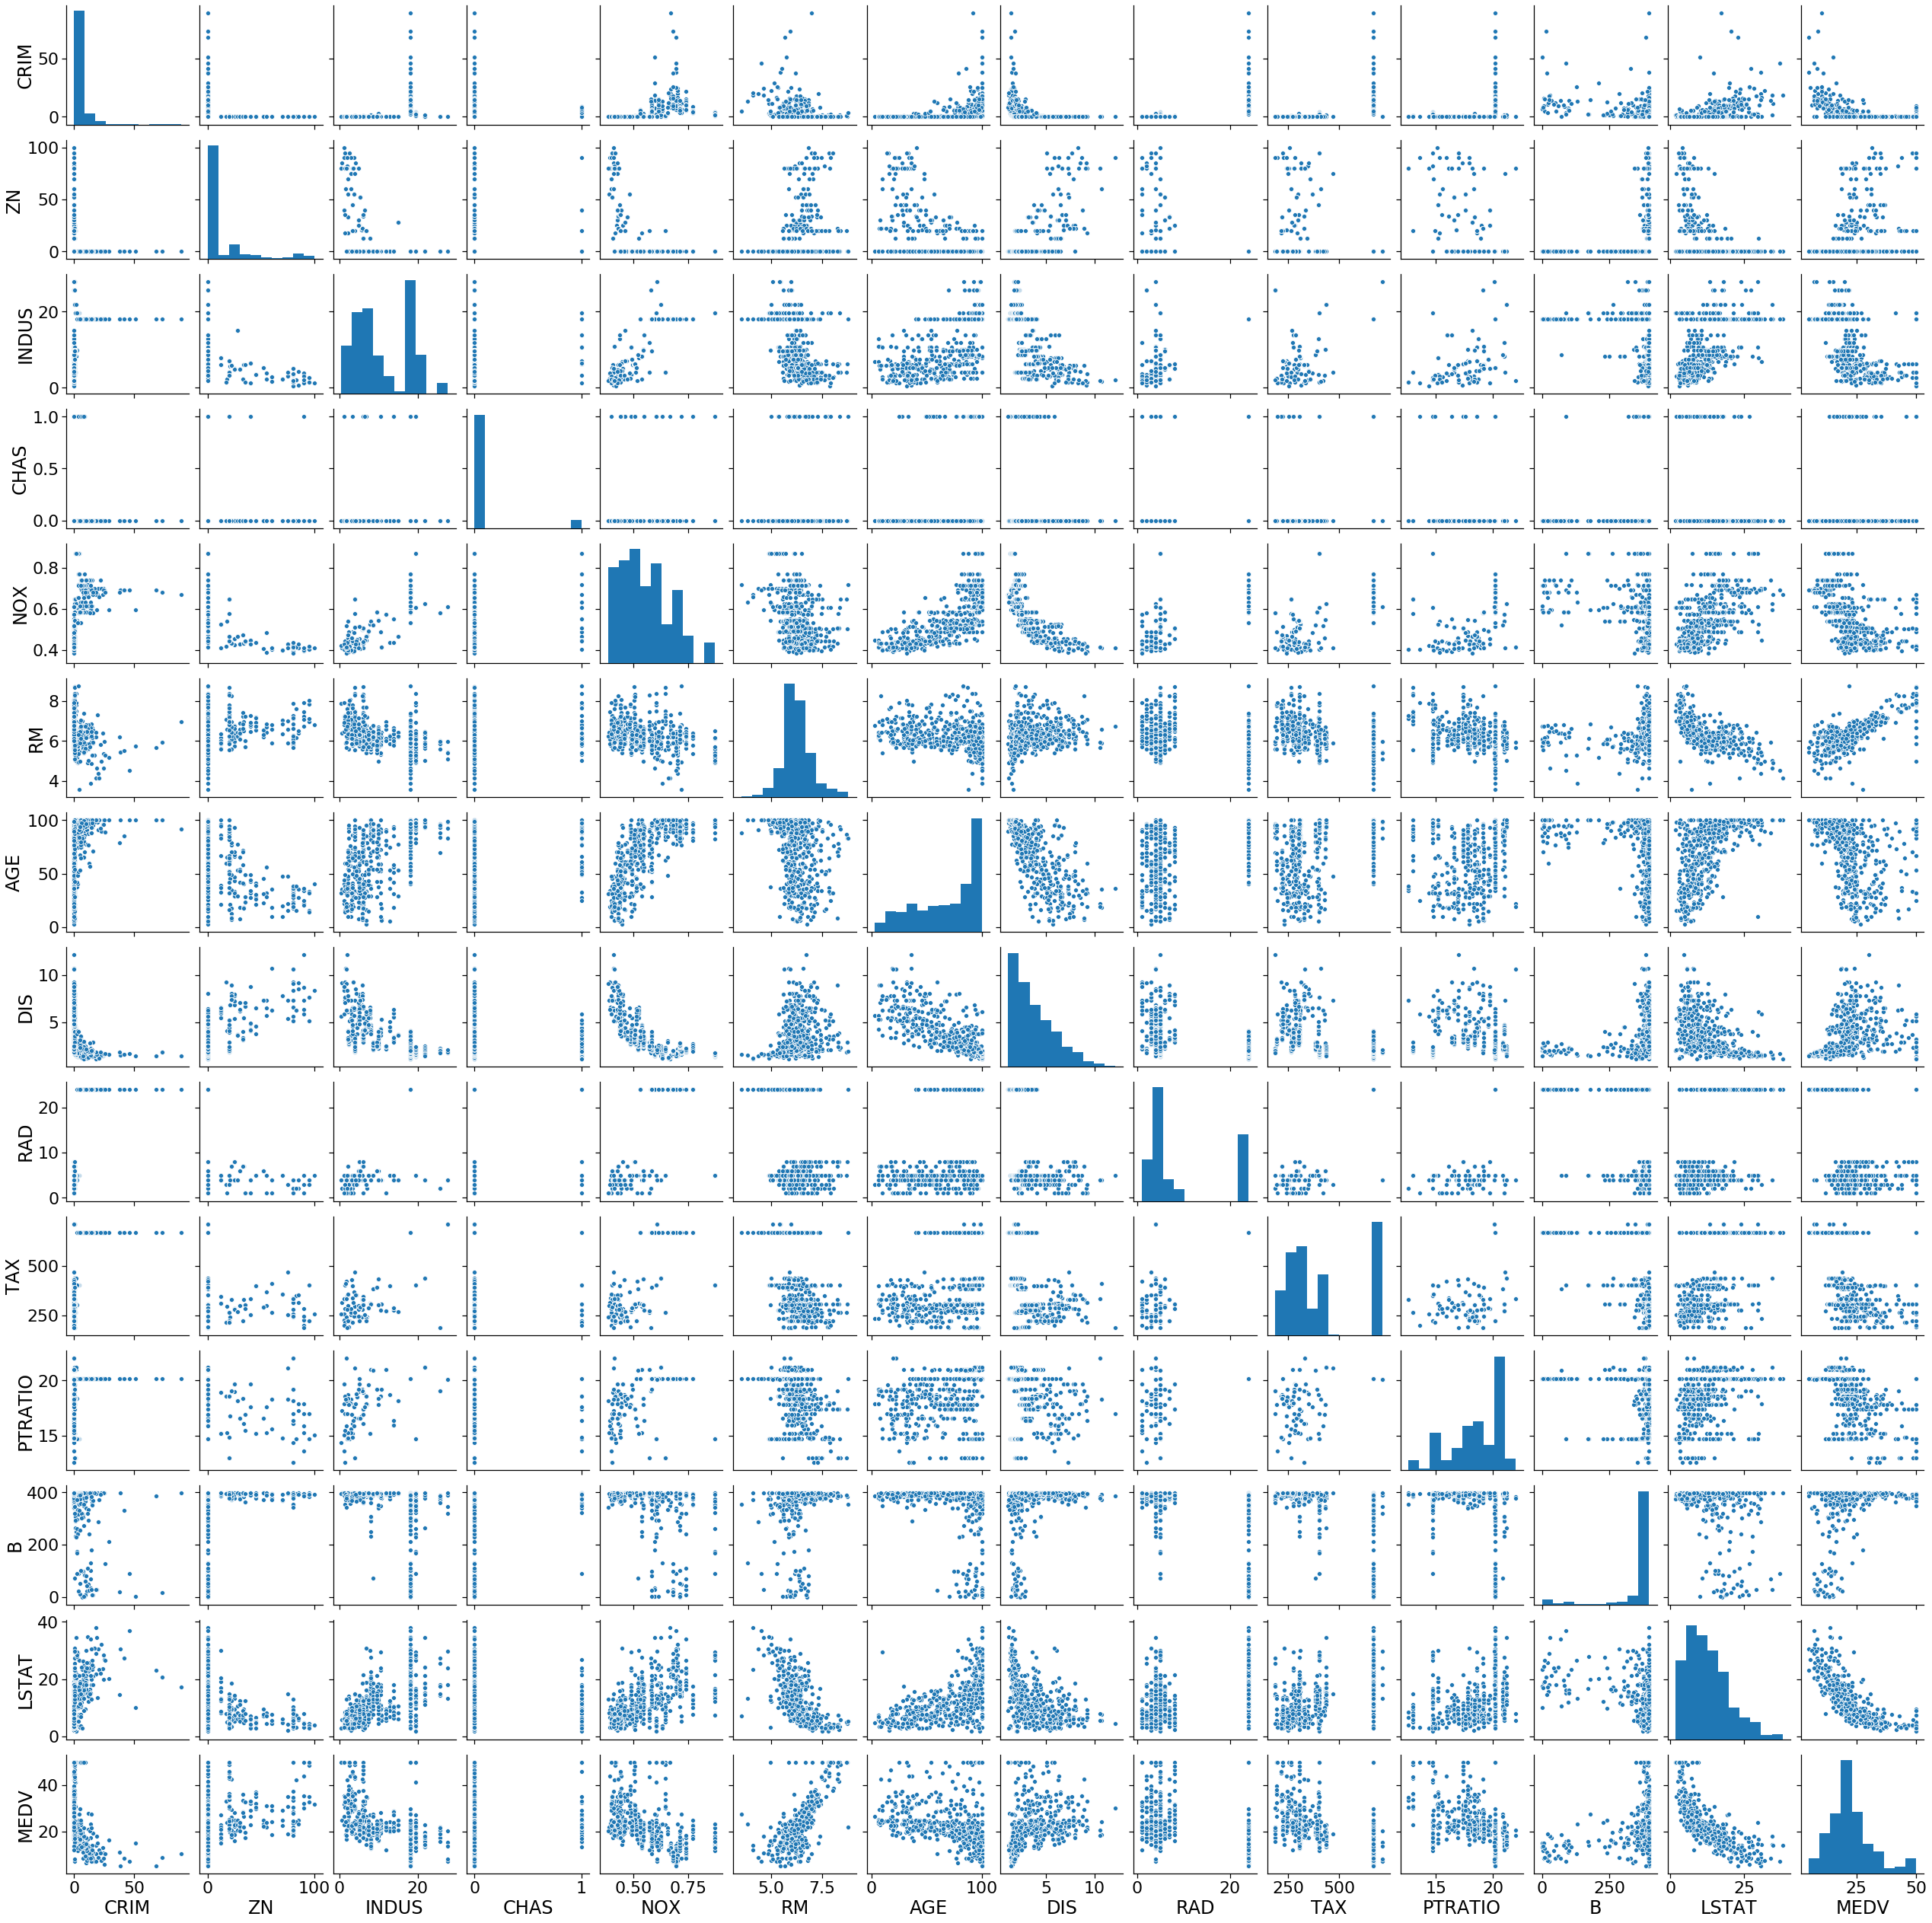

In [14]:
plt.figure(figsize=(24,24));

# Increase font size when plotting in notebooks
sns.set_context("notebook", font_scale=2)

# Plot the pairplot
sns.pairplot(df);
plt.show();

## Linear Regression
We start with simple linear regression and build a model to predict MEDV. We want to show the difference between the evaluation using train/test sets and crossvalidation. For this purpose we will first split the data into train and test. Next we are going to evalutate linear regression using crossvalidation on the train set and then we are going to compare the performance reported using

- Crossvalidation on the train set
- Performance on the train set
- Performance on the test set

Since we are going to use crossvalidation several times and since we want to have replicable results we set the random seed and define the crossvalidation procedure once for all.

In [15]:
# random seed to be used when needed
random_seed=2398745

# uncomment this line to see a completely different result
# random_seed=983458690

# 10-fold crossvalidation
tenfold_xval = KFold(10, shuffle=True, random_state=random_seed)

# train and test generation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_seed)

In [16]:
regressor_linear = LinearRegression()
cv_linear = cross_val_score(regressor_linear, X_train, y_train, cv=tenfold_xval, scoring='r2')
regressor_linear.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_linear_train = r2_score(y_train, regressor_linear.predict(X_train))

# Computing R2 on the train set
r2_score_linear_test = r2_score(y_test, regressor_linear.predict(X_test))

# Computing the Root Mean Square Error
rmse_linear_test = (np.sqrt(mean_squared_error(y_test, regressor_linear.predict(X_test))))

In [17]:
print("              CV: %.3f +/ %.3f"%(cv_linear.mean(),cv_linear.std()))
print("R2_score (train): %.3f"%r2_score_linear_train)
print(" R2_score (test): %.3f"%r2_score_linear_test)
print("            RMSE: %.3f"%rmse_linear_test)

              CV: 0.707 +/ 0.072
R2_score (train): 0.737
 R2_score (test): 0.734
            RMSE: 4.961


As we can see the evaluation on the train set is *optimistic* in that it promise the higher R2 value. The performance reported using crossvalidation is much lower. The performance evaluation on the test is lower than the one measured on the train. But note that these results depend on a random process and might significantly change if we use a different random seed (try to replace the seed 2398745 with 983458690 and see what happens).

### Crossvalidation & Confidence Intervals
Note that crossvalidation return 10 values and from the mean and standard deviation we can compute confidence intervals to estimate a range of plausible values for the model future performance. For example, given the ten data collected from crossvalidation, given a mean R2 of 0.707 and a standard deviation of 0.072 we have that, 

- the 95% confidence interval is (0.662; 0.752), thus with 95% probability we predict that the performance will be between 0.662 and 0.752
- the 99% confidence interval is (0.648; 0.766)
- the 99.5% confidence interval is (0.643; 0.771)

Confidence intervals give us a way to provide a range for future performance that can be very useful when we deploy the final model.

### Residuals Plots
We can analyze the model errors either by plotting (i) the predicted values against the actual values of the target variable and (ii) the predicted values against the residual error.

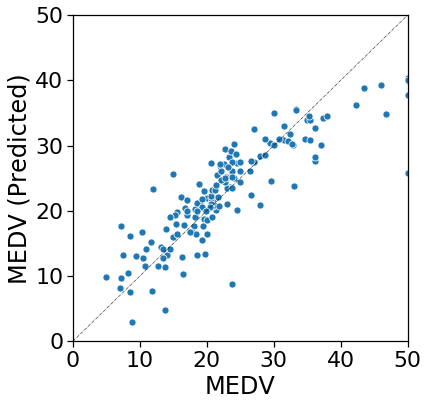

In [18]:
plt.figure(figsize=(6,6))
# font = {'family' : 'sans', 'size'   : 14}
# plt.rc('font', **font)
# plt.plot([0,40],[0,0],'-',c="red")
# plt.plot([0,40],[-3,-3],'--',c="red")
# plt.plot([0,40],[3,3],'--',c="red")
plt.xlabel("MEDV (Actual)")
plt.ylabel("MEDV (Predicted)")
# plt.ylabel("Normalized Residuals")
plt.plot([0,50],[0,50],lw=.5,ls="-.",color='black')
sns.scatterplot(y_test, regressor_linear.predict(X_test),s=50)
plt.xlim([0,50])
plt.ylim([0,50])
plt.show()

It is interesting to check whether the model has the same behavior also on the train set. If it does not, it might suggest that we are learning a model that is not adequate for the test set we are considering. Note that, the values of *MEDV* of 50 (the same that we identified as outlier in our exploratory analysis) are predicted very badly. One possible solution might be to eliminate those few cases and continue our analysis without using the data points with a value of *MEDV* above 50.

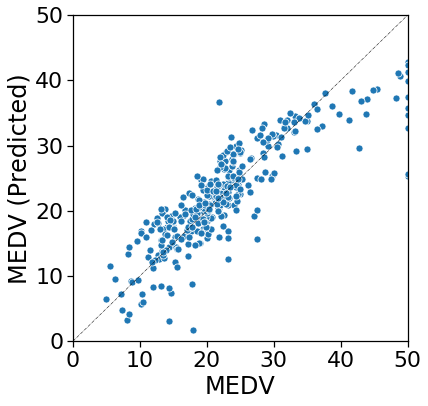

In [19]:
plt.figure(figsize=(6,6))
plt.xlabel("MEDV (Actual)")
plt.ylabel("MEDV (Predicted)")
plt.plot([0,50],[0,50],lw=.5,ls="-.",color='black')
sns.scatterplot(y_train, regressor_linear.predict(X_train),s=50)
plt.xlim([0,50])
plt.ylim([0,50])
plt.show()

As can be noted, the model underestimate the prediction for higher values of the target variable: the dots for high values of "MEDV (Actual)" lie below the line. Again the outlier values of *MEDV* (above 50) are predicted very badly and in a real scenario they might be eliminated from the analysis process. 

In [20]:
residuals_test = regressor_linear.predict(X_test)-y_test
normalized_residuals_test = StandardScaler().fit_transform(residuals_test.values.reshape(-1,1)).reshape(-1,)

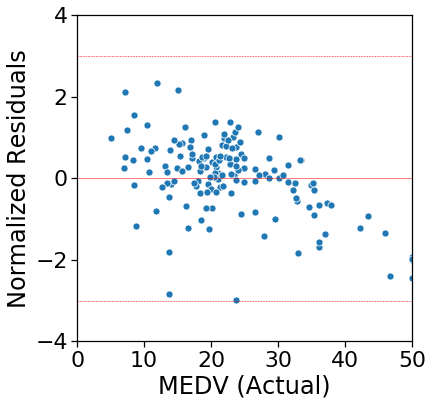

In [21]:
plt.figure(figsize=(6,6))
# font = {'family' : 'sans', 'size'   : 14}
# plt.rc('font', **font)
plt.plot([0,50],[0,0],'-',c="red",lw=0.5)
plt.plot([0,50],[-3,-3],'--',c="red",lw=0.5)
plt.plot([0,60],[3,3],'--',c="red",lw=0.5)
sns.scatterplot(y_test, normalized_residuals_test,s=50)
plt.xlabel("MEDV (Actual)")
plt.ylabel("Normalized Residuals")
plt.xlim([0,50])
plt.ylim([-4,4])
plt.show()

### Feature Analysis 
We can analyze what are the most influential variables for the prediction by plotting the 10 largest coefficients (using absolute values).

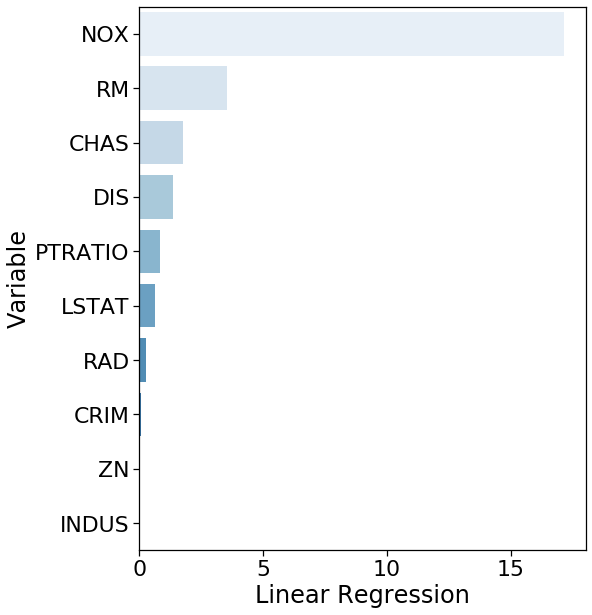

In [22]:
coefficients = pd.DataFrame({'Variable':boston.feature_names, \
                             'Linear Regression':np.abs(regressor_linear.coef_)})
sorted_linear_coefficients = coefficients.sort_values(by=['Linear Regression'], ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(x='Linear Regression', y='Variable', data = sorted_linear_coefficients.head(10),palette='Blues');

Also this plot shows that the model underestimate the prediction for higher values of MEDV.

### Polynomial Regression
We can try to improve our model by fitting a second degree polynomial. To do this, we must,

1. Extend our data by adding the polynomial features for degree 2 to the train and test sets
2. Repeat the above procedure using the new data sets

In [23]:
### STEP 1. Extend the data adding polynomial features

# import the library to generate polynomial features from the existing ones
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features for the train and test sets. We don't want the bias (constant column added) and also 
# we are only using variable interactions (e.g. x*y) rather than squared values (x^2)
polynomial = PolynomialFeatures(degree = 2,include_bias=False,interaction_only=True)
X2_train = polynomial.fit_transform(X_train)
X2_test = polynomial.transform(X_test)

In [24]:
### STEP 2. Repeat the evaluation
regressor_polynomial = LinearRegression()

cv_polynomial = cross_val_score(regressor_polynomial, X2_train, y_train, cv=tenfold_xval, scoring='r2')
regressor_polynomial.fit(X2_train,y_train)

# Computing R2 on the train set
r2_score_polynomial_train = r2_score(y_train, regressor_polynomial.predict(X2_train))

# Computing R2 on the train set
r2_score_polynomial_test = r2_score(y_test, regressor_polynomial.predict(X2_test))

# Computing the Root Mean Square Error
rmse_polynomial_test = (np.sqrt(mean_squared_error(y_test, regressor_polynomial.predict(X2_test))))

In [25]:
### STEP 3. Print the results
print("              CV: %.3f +/ %.3f"%(cv_polynomial.mean(),cv_polynomial.std()))
print("R2_score (train): %.3f"%r2_score_polynomial_train)
print(" R2_score (test): %.3f"%r2_score_polynomial_test)
print("            RMSE: %.3f"%rmse_polynomial_test)

              CV: 0.821 +/ 0.057
R2_score (train): 0.931
 R2_score (test): 0.819
            RMSE: 4.097


The prediction is higher than the model using only the original variables. This suggests that there might be some interesting interactions among the problem features.

### Feature Analysis 
We can analyze what are the most influential variables for the prediction by plotting the 20 largest coefficients. As we can note several variables that are listed represent interactions of the original variables.

In [26]:
coefficients = pd.DataFrame({'Variable':polynomial.get_feature_names(boston.feature_names), \
                             'Linear Regression':np.abs(regressor_polynomial.coef_)})
sorted_coefficients = coefficients.sort_values(by=['Linear Regression'], ascending=False)

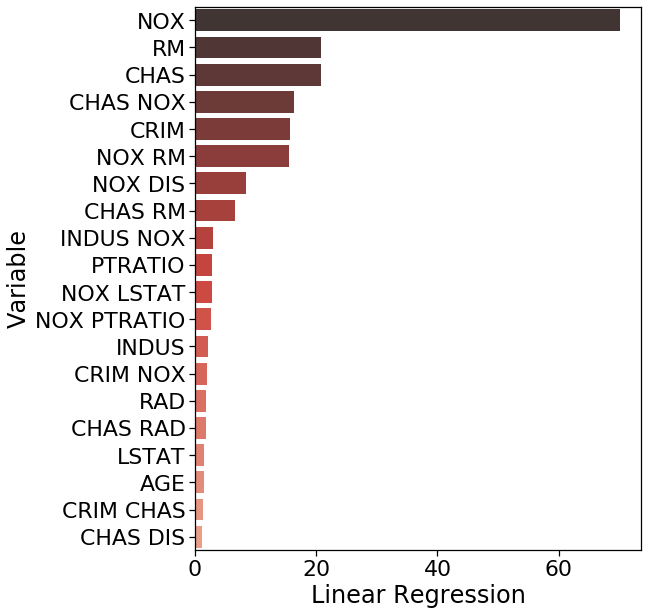

In [27]:
plt.figure(figsize=(8,10))
sns.barplot(x='Linear Regression', y='Variable', data = sorted_coefficients.head(20),palette='Reds_d');

## Ridge and Lasso Regression
We now apply Ridge (L$_2$) and Lasso (L$_1$) regression. First, we need to apply normalization to the data set since there are variables that have very different ranges. For example, variable *B* and *Tax* have values measured in hundreds while *LSTAT* has much lower values. Next, we apply Ridge and Lasso regression using the same approach as before.

### Normalization
When we have variables of different scales, although the algorithm processes each variable separately, the optimization process will tend to be dominated by the variables with higher values. This has also an impact on the number of iterations required to convergence and sometimes, as we have seen in some examples, we might not reach convergence or have numerical stability issues depending on the method. The solution is to normalize the data so that all the features are on the same scale. We can apply basic range normalization which rescale the values in the interval between 0 and 1. We can apply z-score normalization (also called standardization) that rescale a feature to have mean zero and variance  one.

In [28]:
# STEP #1 Standardize the data

# we apply standardization
scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.transform(X_test)

# next we generate the polynomial features

polynomial = PolynomialFeatures(degree = 2,include_bias=False,interaction_only=True)
X2s_train = polynomial.fit_transform(Xs_train)
X2s_test = polynomial.transform(Xs_test)

In [29]:
### STEP 2. Repeat the evaluation
ridge_polynomial = Ridge()

cv_ridge = cross_val_score(ridge_polynomial, X2s_train, y_train, cv=tenfold_xval, scoring='r2')
ridge_polynomial.fit(X2s_train,y_train)

# Computing R2 on the train set
r2_score_ridge_train = r2_score(y_train, ridge_polynomial.predict(X2s_train))

# Computing R2 on the train set
r2_score_ridge_test = r2_score(y_test, ridge_polynomial.predict(X2s_test))

# Computing the Root Mean Square Error
rmse_ridge_test = (np.sqrt(mean_squared_error(y_test, ridge_polynomial.predict(X2s_test))))

In [30]:
### STEP 3. Print the results
print("              CV: %.3f +/ %.3f"%(cv_ridge.mean(),cv_ridge.std()))
print("R2_score (train): %.3f"%r2_score_ridge_train)
print(" R2_score (test): %.3f"%r2_score_ridge_test)
print("            RMSE: %.3f"%rmse_ridge_test)

              CV: 0.846 +/ 0.055
R2_score (train): 0.928
 R2_score (test): 0.847
            RMSE: 3.757


### Scikit-Learn Pipelines
Instead of repeating all the steps over and over, we can create a pipeline that encode the sequence of polynomial feature creation, normalization, and modeling. We now apply Lasso. We use a value of $\alpha$ of 0.01 but we could as well applied a procedure to compute the best possible value of $\alpha$.

In [31]:
from sklearn.pipeline import Pipeline

lasso_steps = [
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree = 2,include_bias=False,interaction_only=True)),
    ('model', Lasso(alpha=0.01,max_iter=3000))
]

lasso_pipeline = Pipeline(lasso_steps)

In [32]:
# STEP 1. Repeat the whole process but this time, when I invoke fit, it will run the entire sequence of functions
#         In fact, I am starting from the raw train and test data
cv_lasso = cross_val_score(lasso_pipeline, X_train, y_train, cv=tenfold_xval, scoring='r2')
lasso_pipeline.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_lasso_train = r2_score(y_train, lasso_pipeline.predict(X_train))

# Computing R2 on the train set
r2_score_lasso_test = r2_score(y_test, lasso_pipeline.predict(X_test))

# Computing the Root Mean Square Error
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, lasso_pipeline.predict(X_test))))

In [33]:
### STEP 2. Print the results
print("              CV: %.3f +/ %.3f"%(cv_lasso.mean(),cv_lasso.std()))
print("R2_score (train): %.3f"%r2_score_lasso_train)
print(" R2_score (test): %.3f"%r2_score_lasso_test)
print("            RMSE: %.3f"%rmse_lasso_test)

              CV: 0.845 +/ 0.070
R2_score (train): 0.925
 R2_score (test): 0.859
            RMSE: 3.607


### Analysis of Feature Importance
We can repeat the analysis of feature importance for the Ridge and Lasso regression. Note that we should not compare these values with the ones computed for simple linear regression since the first model was fitted using the original data, whereas these two models are based on the standardized data. 

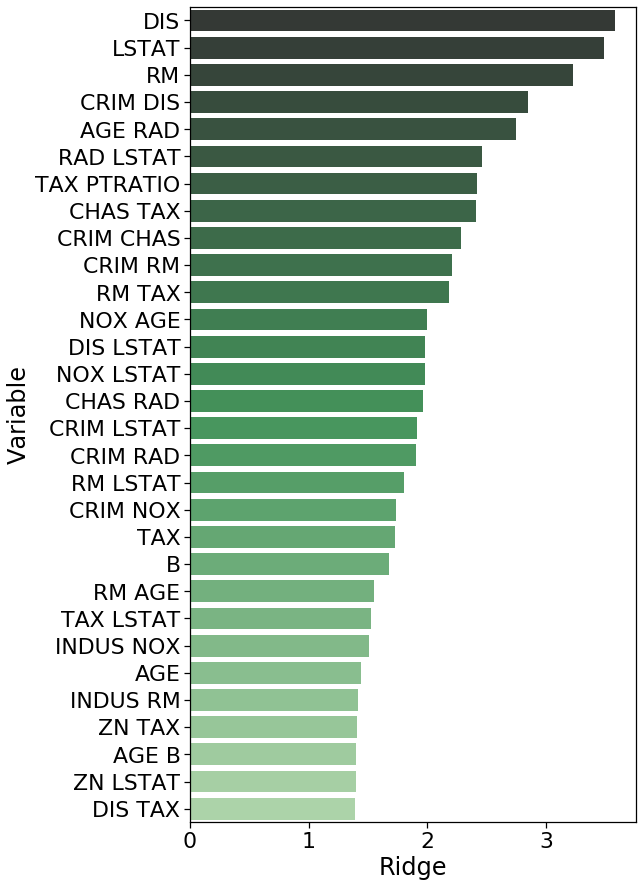

In [34]:
coefficients['Ridge'] = np.abs(ridge_polynomial.coef_)
coefficients['Lasso'] = np.abs(lasso_pipeline[2].coef_)
plt.figure(figsize=(8,15))
sns.barplot(x='Ridge', y='Variable', data = coefficients.sort_values(by=['Ridge'],ascending=False).head(30),palette='Greens_d');

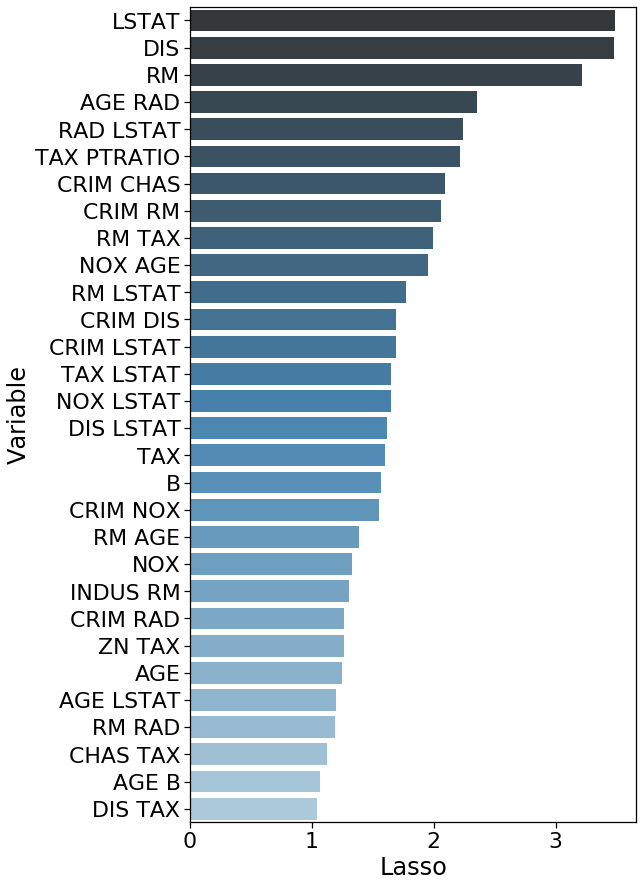

In [35]:
plt.figure(figsize=(8,15))
sns.barplot(x='Lasso', y='Variable', data = coefficients.sort_values(by=['Lasso'],ascending=False).head(30),palette='Blues_d');

Note that the weights produced by Linear Regression, Ridge and Lasso have much different scales. The first plot shows weight absolute values ranges between zero and 20 whereas for Ridge and Lasso have values between 0 and 3.5.

The $\alpha$ parameter influence the weight penalization. If we increase $\alpha$ to 1 in Lasso for example, we will increase weight penalization so that we will get smaller weight values and for several variables the weights will go to zero. However, this will also lead to a decrease of the model performance. 

## k-Nearest Neighbor Regression
Now, let's go further and apply other regression methods. We start from k-nearest neighbor regression.

In [35]:
from sklearn.neighbors import KNeighborsRegressor

knn_steps = [
    ('scaler', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree = 2,include_bias=False,interaction_only=True)),
    ('model', KNeighborsRegressor(n_neighbors= 5, weights='uniform', algorithm='kd_tree', leaf_size=30))
]

knn_pipeline = Pipeline(knn_steps)

In [36]:
# STEP 1. Repeat the whole process but this time, when I invoke fit, it will run the entire sequence of functions
#         In fact, I am starting from the raw train and test data
cv_knn = cross_val_score(knn_pipeline, X_train, y_train, cv=tenfold_xval, scoring='r2')
knn_pipeline.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_knn_train = r2_score(y_train, knn_pipeline.predict(X_train))

# Computing R2 on the train set
r2_score_knn_test = r2_score(y_test, knn_pipeline.predict(X_test))

# Computing the Root Mean Square Error
rmse_knn_test = (np.sqrt(mean_squared_error(y_test, knn_pipeline.predict(X_test))))

In [37]:
### STEP 2. Print the results
print("              CV: %.3f +/ %.3f"%(cv_knn.mean(),cv_knn.std()))
print("R2_score (train): %.3f"%r2_score_knn_train)
print(" R2_score (test): %.3f"%r2_score_knn_test)
print("            RMSE: %.3f"%rmse_knn_test)

              CV: 0.725 +/ 0.142
R2_score (train): 0.825
 R2_score (test): 0.776
            RMSE: 4.551


We applied k-NN with with a value of k equal to 5. If we use a smaller k (like for example 1), the average performance is lower but, most importantly, the corresponding standard deviation is likely to increase because the predicted value is based only on one data point  and might be noisy. If we use a larger k (like for example 10 or 20) the prediction  the associated standard deviation is likely to decrease as k increases. Overall, a value of 5 for k might be a good trade-off although its predicted performance is much worse than previous linear models.

## Regression using Decision Trees (or Regression Trees)
We can apply decision trees to compute a regression model. Note that decision trees don't use the input variables for computation but work by partitioning the input space. Accordingly, they don't need any normalization.

In [38]:
### STEP 1. Evaluate the model
from sklearn.tree import DecisionTreeRegressor

regressor_tree = DecisionTreeRegressor(max_depth=3, random_state=random_seed)
cv_tree = cross_val_score(regressor_tree, X_train, y_train, cv=tenfold_xval, scoring='r2')
regressor_tree.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_tree_train = r2_score(y_train, regressor_tree.predict(X_train))

# Computing R2 on the train set
r2_score_tree_test = r2_score(y_test, regressor_tree.predict(X_test))

# Computing the Root Mean Square Error
rmse_tree_test = (np.sqrt(mean_squared_error(y_test, regressor_tree.predict(X_test))))

In [39]:
### STEP 2. Print the results
print("              CV: %.3f +/ %.3f"%(cv_tree.mean(),cv_tree.std()))
print("R2_score (train): %.3f"%r2_score_tree_train)
print(" R2_score (test): %.3f"%r2_score_tree_test)
print("            RMSE: %.3f"%rmse_tree_test)

              CV: 0.700 +/ 0.160
R2_score (train): 0.831
 R2_score (test): 0.631
            RMSE: 5.841


## Random Forests
One tree performs rather poorly compared to linear regressors. We can try to use an entire forest of trees and check what happens. 

In [40]:
### STEP 1. Evaluate the model
from sklearn.ensemble import RandomForestRegressor

regressor_rf = RandomForestRegressor(n_estimators = 500,max_ random_state = random_seed)

cv_rf = cross_val_score(regressor_rf, X_train, y_train, cv=tenfold_xval, scoring='r2')
regressor_rf.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_rf_train = r2_score(y_train, regressor_rf.predict(X_train))

# Computing R2 on the train set
r2_score_rf_test = r2_score(y_test, regressor_rf.predict(X_test))

# Computing the Root Mean Square Error
rmse_rf_test = (np.sqrt(mean_squared_error(y_test, regressor_rf.predict(X_test))))

In [41]:
### STEP 2. Print the results
print("              CV: %.3f +/ %.3f"%(cv_rf.mean(),cv_rf.std()))
print("R2_score (train): %.3f"%r2_score_rf_train)
print(" R2_score (test): %.3f"%r2_score_rf_test)
print("            RMSE: %.3f"%rmse_rf_test)

              CV: 0.840 +/ 0.112
R2_score (train): 0.978
 R2_score (test): 0.871
            RMSE: 3.458


## Gradient Boosting Regressor
Finally, let's apply gradient boosting. If you want to try the very powerful xgboost you have to install the library separately from https://xgboost.readthedocs.io/

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

regressor_gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=500, random_state=random_seed)

cv_gbr = cross_val_score(regressor_gbr, X_train, y_train, cv=tenfold_xval, scoring='r2')
regressor_gbr.fit(X_train,y_train)

# Computing R2 on the train set
r2_score_gbr_train = r2_score(y_train, regressor_gbr.predict(X_train))

# Computing R2 on the train set
r2_score_gbr_test = r2_score(y_test, regressor_rf.predict(X_test))

# Computing the Root Mean Square Error
rmse_gbr_test = (np.sqrt(mean_squared_error(y_test, regressor_gbr.predict(X_test))))

In [43]:
### STEP 2. Print the results
print("              CV: %.3f +/ %.3f"%(cv_gbr.mean(),cv_gbr.std()))
print("R2_score (train): %.3f"%r2_score_gbr_train)
print(" R2_score (test): %.3f"%r2_score_gbr_test)
print("            RMSE: %.3f"%rmse_gbr_test)

              CV: 0.842 +/ 0.105
R2_score (train): 0.975
 R2_score (test): 0.871
            RMSE: 3.710


## Comparing Perfomance
We can now collect all the data about the performance of all the models and discuss our findings. The bar plot below reports for each model the average R$^2$ with error bars showing the standard error $\sigma/k$, with $k$ is the number of crossvalidation folds.

In [44]:
models = [('Linear Regression', rmse_linear_test, r2_score_linear_train, r2_score_linear_test, cv_linear.mean(), cv_linear.std()),
          ('Polynomial Regression (2nd)', rmse_polynomial_test, r2_score_polynomial_train, r2_score_polynomial_test, cv_polynomial.mean(), cv_polynomial.std()),
          ('Ridge Regression', rmse_ridge_test, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean(), cv_ridge.std()),
          ('Lasso Regression', rmse_lasso_test, r2_score_lasso_train, r2_score_lasso_test, cv_lasso.mean(), cv_lasso.std()),
          ('Support Vector Regression', rmse_knn_test, r2_score_knn_train, r2_score_knn_test, cv_knn.mean(), cv_knn.std()),
          ('Decision Tree Regression', rmse_tree_test, r2_score_tree_train, r2_score_tree_test, cv_tree.mean(), cv_tree.std()),
          ('Random Forest Regression', rmse_rf_test, r2_score_rf_train, r2_score_rf_test, cv_rf.mean(), cv_rf.std()),
          ('Gradient Boosting Regression', rmse_gbr_test, r2_score_gbr_train, r2_score_gbr_test, cv_gbr.mean(), cv_gbr.std())    
         ]
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'CV Mean', 'CV Std'])
predict.sort_values(by=['CV Mean'],ascending=False)

,Model,RMSE,R2_Score(training),R2_Score(test),CV Mean,CV Std
2,Ridge Regression,3.757497,0.927628,0.847445,0.846371,0.054659
3,Lasso Regression,3.606973,0.924641,0.859423,0.845193,0.070051
7,Gradient Boosting Regression,3.709825,0.974818,0.870805,0.842499,0.104721
6,Random Forest Regression,3.457868,0.977877,0.870805,0.839796,0.111578
1,Polynomial Regression (2nd),4.096625,0.931109,0.818665,0.820551,0.056508
4,Support Vector Regression,4.550668,0.825449,0.776242,0.724833,0.141843
0,Linear Regression,4.961402,0.737261,0.734027,0.707284,0.071732
5,Decision Tree Regression,5.841354,0.830514,0.631315,0.700018,0.160289


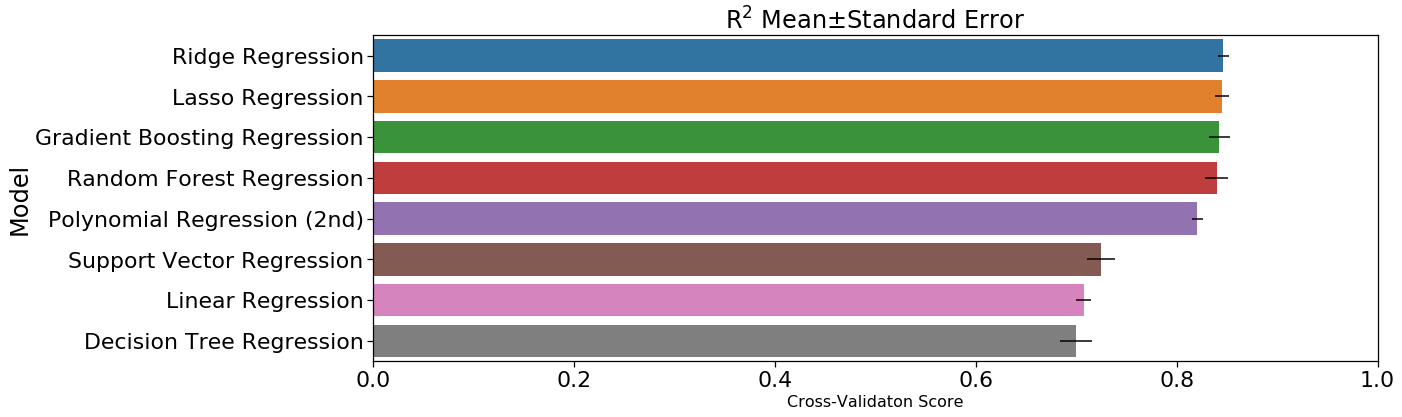

In [45]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['CV Mean'], ascending=False, inplace=True)

sns.barplot(x='CV Mean', y='Model', data = predict, xerr=predict['CV Std']/10, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_title("R$^2$ Mean$\pm$Standard Error")
axe.set_xlim(0,1.0)
plt.show()

## Model Selection
We now need to decide what model to select. We evaluated all the models using crossvalidation so we can apply t-test to check whether the difference in performance is statistically significant. Next, we can decide what model we should deploy. It is rather clear that the performance of SVR, Linear Regression and Decision Trees will turn out to be statistically significant. It is interesting to check whether the difference in the top four-five models is statistically significant.

First, we generate a data frame containing all the raw crossvalidation performance. Next, we apply t-test to all the possible pairwise combination. Note that, since the all the crossvalidation were computed using the same folds, we can apply a paired t-test.

In [46]:
df_crossvalidation = pd.DataFrame({
    'Ridge Regression':cv_ridge,
    'Lasso Regression':cv_lasso,
    'Gradient Boosting Regression':cv_gbr,
    'Random Forest Regression':cv_rf,
    'Polynomial Regression (2nd)':cv_polynomial,    
    'Support Vector Regression':cv_knn,
    'Linear Regression':cv_linear,
    'Decision Tree Regression':cv_tree,
})


In [47]:
confidence_level = 0.95

no_variables = len(df_crossvalidation.columns)

p_value = np.zeros((no_variables,no_variables))

for first,first_model in enumerate(df_crossvalidation.columns):
    
    p_value[first,first] = 1.0
    
    for second in range(first+1,(len(df_crossvalidation.columns))):

        second_model = df_crossvalidation.columns[second]
        
        paired_test = stats.ttest_rel(df_crossvalidation[first_model], df_crossvalidation[second_model])
    
        p_value[first,second] = paired_test[1]
        p_value[second,first] = paired_test[1]
        
        if (paired_test[1]<(1-confidence_level)):
            print("%15s vs %15s => Difference is statistically significant (cf %3.2f p-value=%.4f)"%(first_model,second_model,confidence_level*100,paired_test[1]))

Ridge Regression vs Polynomial Regression (2nd) => Difference is statistically significant (cf 95.00 p-value=0.0200)
Ridge Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0199)
Ridge Regression vs Linear Regression => Difference is statistically significant (cf 95.00 p-value=0.0000)
Ridge Regression vs Decision Tree Regression => Difference is statistically significant (cf 95.00 p-value=0.0287)
Lasso Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0176)
Lasso Regression vs Linear Regression => Difference is statistically significant (cf 95.00 p-value=0.0000)
Lasso Regression vs Decision Tree Regression => Difference is statistically significant (cf 95.00 p-value=0.0223)
Gradient Boosting Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0357)
Gradient Boosting Regression vs Linear Regression => Difference is statistically sig

In [48]:
p_value_mat = pd.DataFrame(data=p_value,index=df_crossvalidation.columns,columns=df_crossvalidation.columns)

<Figure size 1152x1152 with 0 Axes>

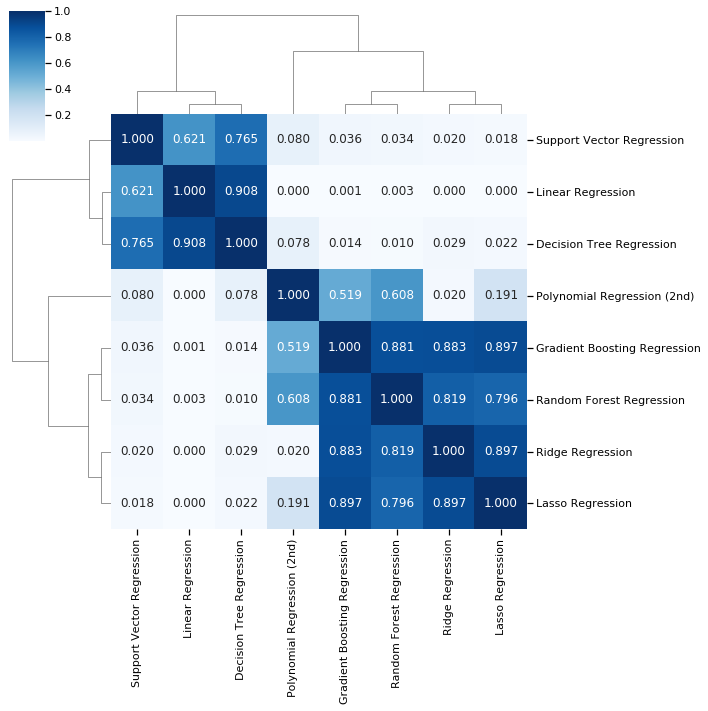

In [49]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5});
# Plot the clustermap
# sns.clustermap(corrmat, annot=True,vmax=0.9,fmt=".2f");
plt.figure(figsize=(16,16));
sns.clustermap(p_value_mat,annot=True,fmt=".3f",cmap="Blues");

As can be noted, the difference all the top four approaches are not statistically significant since their p-value is almost one and thus must higher than 0.05 (computed as 1-confidence level). Also the difference with polynomial regression is not statistically significant but has a lower p-value. And its difference with the top scoring method (Ridge Regression) is actually statistically significant. 

I can repeat the same analysis using a non-parametric test, that does not assume that the performance is normally distributed.

In [50]:
confidence_level = 0.95

no_variables = len(df_crossvalidation.columns)

wilcoxon_p_value = np.zeros((no_variables,no_variables))

for first,first_model in enumerate(df_crossvalidation.columns):
    
    wilcoxon_p_value[first,first] = 1.0
    
    for second in range(first+1,(len(df_crossvalidation.columns))):

        second_model = df_crossvalidation.columns[second]
        
        wilcoxon_test = stats.wilcoxon(df_crossvalidation[first_model], df_crossvalidation[second_model])
    
        wilcoxon_p_value[first,second] = wilcoxon_test[1]
        wilcoxon_p_value[second,first] = wilcoxon_test[1]

        
        if (wilcoxon_test[1]<(1-confidence_level)):
            print("%15s vs %15s => Difference is statistically significant (cf %3.2f p-value=%.4f)"%(first_model,second_model,confidence_level*100,wilcoxon_test[1]))

Ridge Regression vs Polynomial Regression (2nd) => Difference is statistically significant (cf 95.00 p-value=0.0284)
Ridge Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0166)
Ridge Regression vs Linear Regression => Difference is statistically significant (cf 95.00 p-value=0.0051)
Ridge Regression vs Decision Tree Regression => Difference is statistically significant (cf 95.00 p-value=0.0367)
Lasso Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0166)
Lasso Regression vs Linear Regression => Difference is statistically significant (cf 95.00 p-value=0.0051)
Lasso Regression vs Decision Tree Regression => Difference is statistically significant (cf 95.00 p-value=0.0284)
Gradient Boosting Regression vs Support Vector Regression => Difference is statistically significant (cf 95.00 p-value=0.0367)
Gradient Boosting Regression vs Linear Regression => Difference is statistically sig

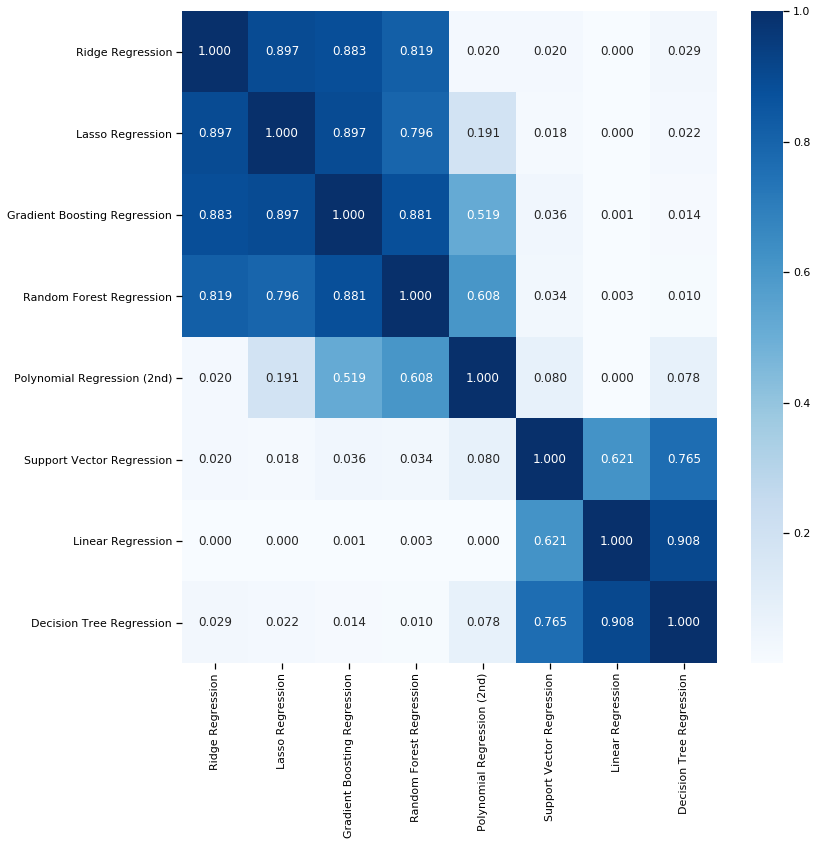

In [51]:
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5});
# Plot the clustermap
# sns.clustermap(corrmat, annot=True,vmax=0.9,fmt=".2f");
plt.figure(figsize=(12,12));
sns.heatmap(p_value_mat,annot=True,fmt=".3f",cmap="Blues");

Note that we performed 28 comparisons since we have 8 classifiers and thus we perfomed 7x8/2 (or "8 choose 2") comparisons we might want to applyBonferroni's correction. Our current $\alpha$ for a 95% confidence level is 0.05 the adjusted version would be 0.05/28 that is, 0.0018. If we use this new adjusted threshold then every difference becomes not statistically significant except the ones against linear regression. It would be a very robust approach but not really useful to select a model.

Text(0.5, 1, 'Dark blue position identify statistically significant differences')

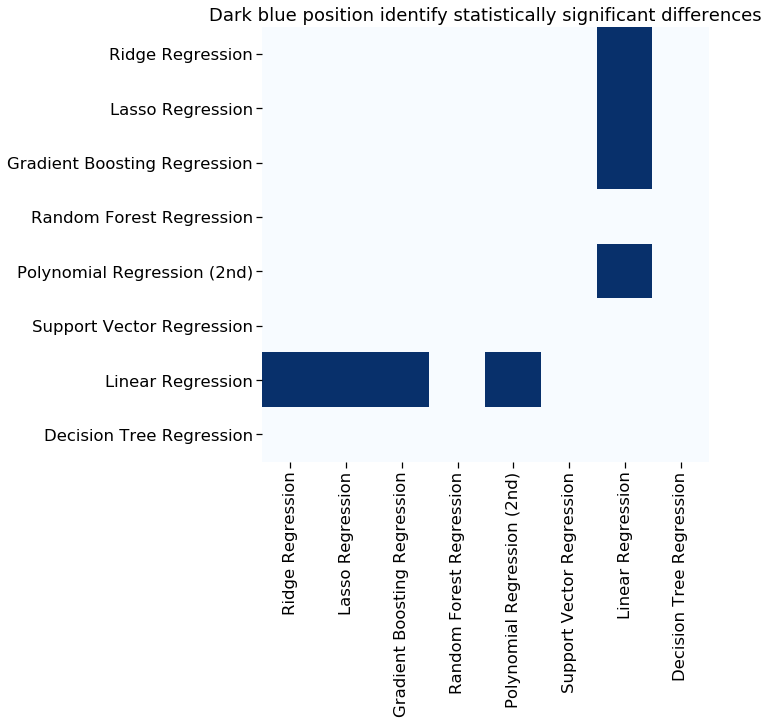

In [64]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = plt.figure(figsize=(8,8))
sns.heatmap(p_value_mat<(1-confidence_level)/28,fmt=".3f",cmap="Blues",cbar=False)
plt.title("Dark blue position identify statistically significant differences")

## Discussion
We built several models for the Boston Housing dataset. Ridge and Lasso perform slightly better than Gradient Boosting and Random Forests which perform better than basic linear regression using 2nd degree polynomials. The question is now whether the difference we measure is statistically significant. If it is, then we can select the model with the best performance. If the difference is not statistically significant, it means that the difference we see is likely to be due by chance so we might base our decision on other factors like for instance the model complexity. In this case, we might decide to choose the simple model and/or the less computationally expensive model. 

For example, we note that, although Gradient Boosting and Random Forests use the same number of predictors (500), gradient boosting is using tree that are limited in depth (max_depth=2) whereas the trees in the random forest are not limited. Thus, the random forest model is more complex than the one built by gradient boosting.
